<a href="https://colab.research.google.com/github/Manya123-max/Machine-Learning-Algorithms/blob/main/SupportVectorMachine_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

In [ ]:
# Load the new dataset
data = pd.read_csv('//content/customer churn2.csv')
print(data.head())

   Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1  


In [ ]:
# Data Preprocessing
print(data.describe())
print(data.isnull().sum())
print(data.duplicated().sum())

             Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914    101.064806         0.903090     0.276628     0.816475   
std       0.352067     39.822106         0.295879     0.447398     1.272668   
min       0.000000      1.000000         0.000000     0.000000     0.000000   
25%       0.000000     74.000000         1.000000     0.000000     0.000000   
50%       0.000000    101.000000         1.000000     0.000000     0.000000   
75%       0.000000    127.000000         1.000000     1.000000     1.780000   
max       1.000000    243.000000         1.000000     1.000000     5.400000   

       CustServCalls      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count    3333.000000  3333.000000  3333.000000    3333.000000  3333.000000   
mean        1.562856   179.775098   100.435644      56.305161    10.051488   
std         1.315491    54.467389    20.069084      16

In [ ]:
# Ensure all column names are strings
data.columns = data.columns.astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming `data` is your DataFrame
label_encoders = {}
for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

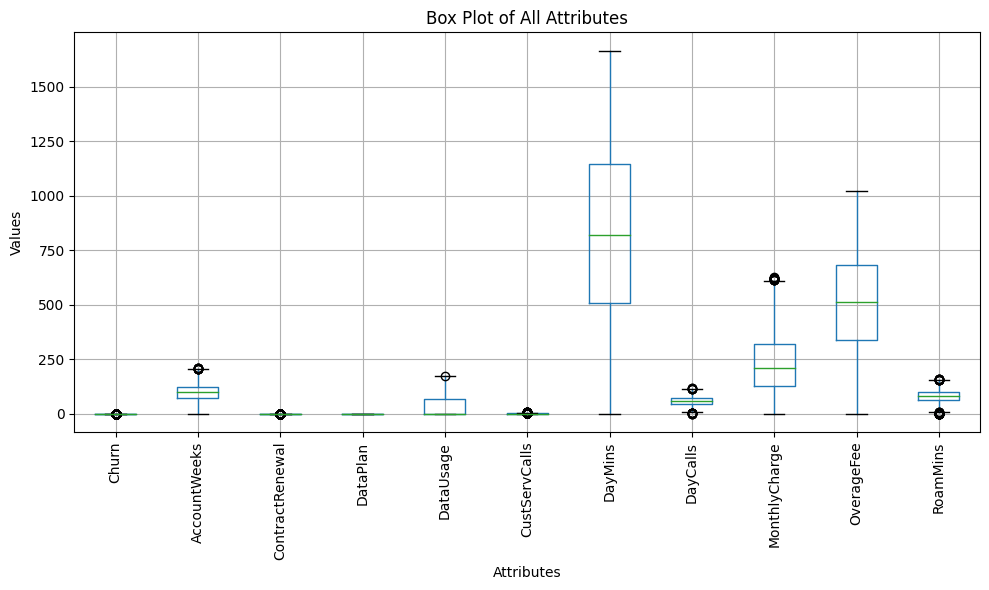

In [ ]:
# Create box plots for all attributes
plt.figure(figsize=(10, 6))  # Set the figure size
data.boxplot()  # Create box plots for all attributes
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Box Plot of All Attributes')
plt.ylabel('Values')
plt.xlabel('Attributes')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler# Perform Z-score normalization for all columns except the target variable 'Churn'
scaler = StandardScaler()
cols_to_normalize = data.columns[data.columns != 'Churn']  # Exclude the target variable
data[cols_to_normalize] = scaler.fit_transform(data[cols_to_normalize])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming `data` is your DataFrame containing all features including 'Churn'

# Drop 'Churn' column from data and store it in y
y = data['Churn']
X = data.drop(['Churn'], axis=1)  # Drop 'Churn' from features to get X

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train, X_test, y_train, y_test are ready for training and testing your model


In [ ]:
# Training an SVM Model with RBF kernel
svm_model = svm.SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Training a Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Evaluating SVM Model
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_roc_auc = roc_auc_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)

In [ ]:
# Evaluating Logistic Regression Model
logistic_y_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_roc_auc = roc_auc_score(y_test, logistic_y_pred)
logistic_f1 = f1_score(y_test, logistic_y_pred)

In [ ]:

# Print accuracy and ROC-AUC score for both models
print(f"SVM Model Accuracy: {svm_accuracy * 100:.2f}%")
print(f"SVM Model ROC-AUC Score: {svm_roc_auc:.4f}")
print(f"  F1 Score: {svm_f1:.4f}")
print(f"Logistic Regression Model Accuracy: {logistic_accuracy * 100:.2f}%")
print(f"Logistic Regression Model ROC-AUC Score: {logistic_roc_auc:.4f}")
print(f"  F1 Score: {logistic_f1:.4f}")

SVM Model Accuracy: 88.91%
SVM Model ROC-AUC Score: 0.6377
  F1 Score: 0.4308
Logistic Regression Model Accuracy: 86.51%
Logistic Regression Model ROC-AUC Score: 0.5829
  F1 Score: 0.2857


In [ ]:
# Displaying classification report for both models
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_y_pred))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       566
           1       0.97      0.28      0.43       101

    accuracy                           0.89       667
   macro avg       0.93      0.64      0.68       667
weighted avg       0.90      0.89      0.86       667

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       566
           1       0.72      0.18      0.29       101

    accuracy                           0.87       667
   macro avg       0.80      0.58      0.61       667
weighted avg       0.85      0.87      0.83       667



In [ ]:
# Confusion Matrix for both models
svm_cm = confusion_matrix(y_test, svm_y_pred)
logistic_cm = confusion_matrix(y_test, logistic_y_pred)


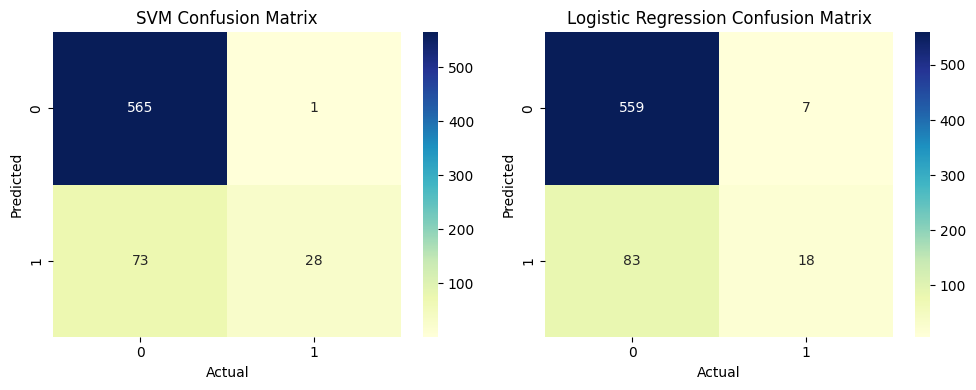

In [ ]:
# Visualize confusion matrix with seaborn heatmap
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# SVM Confusion Matrix
sns.heatmap(pd.DataFrame(svm_cm), annot=True, fmt='d', cmap='YlGnBu', ax=axes[0])
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')

# Logistic Regression Confusion Matrix
sns.heatmap(pd.DataFrame(logistic_cm), annot=True, fmt='d', cmap='YlGnBu', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()


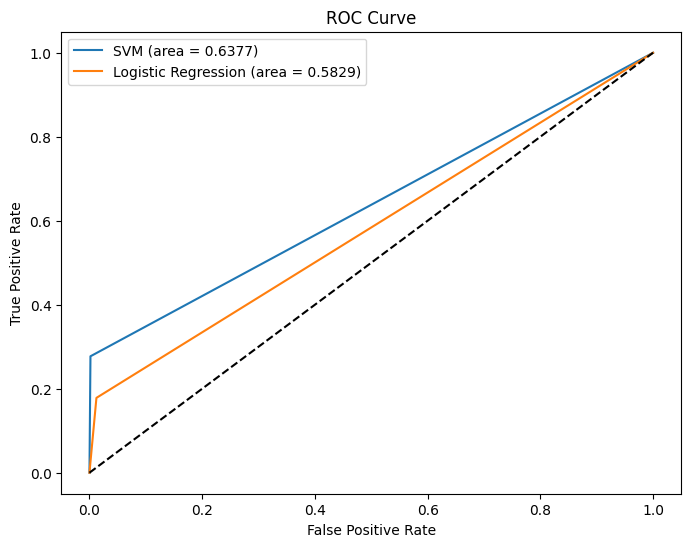

In [ ]:
# Plot ROC curve for both models
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_y_pred)
logistic_fpr, logistic_tpr, logistic_thresholds = roc_curve(y_test, logistic_y_pred)

plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, label=f'SVM (area = {svm_roc_auc:.4f})')
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (area = {logistic_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Comparing SVM and Logistic Regression
print("SVM Model Accuracy: {:.2f}%".format(svm_accuracy * 100))
print("SVM Model ROC-AUC Score: {:.4f}".format(svm_roc_auc))
print("\nLogistic Regression Model Accuracy: {:.2f}%".format(logistic_accuracy * 100))
print("Logistic Regression Model ROC-AUC Score: {:.4f}".format(logistic_roc_auc))

# Discussing Trade-offs
print("\nTrade-offs between SVM and Logistic Regression:")
print("-" * 50)
print("1. Interpretability:")
print("- Logistic Regression provides coefficients directly indicating feature importance.")
print("- SVM is less interpretable, focusing on maximizing margins in higher-dimensional space.")

print("\n2. Performance:")
print("- Logistic Regression is efficient with linear separable datasets.")
print("- SVM is effective in high-dimensional spaces and with non-linear decision boundaries (using kernels).")

print("\n3. Complexity:")
print("- Logistic Regression is simpler and less prone to overfitting.")
print("- SVM can capture complex relationships but requires tuning of C (regularization) and kernel parameters.")

print("\n4. Dataset Size:")
print("- Logistic Regression scales well with large datasets.")
print("- SVM may have longer training times and higher resource requirements with large datasets.")

print("\n5. Robustness to Outliers:")
print("- Logistic Regression can be sensitive to outliers due to its loss function.")
print("- SVM is less sensitive to outliers because of its reliance on support vectors.")

print("\n6. Kernel Choice (for SVM):")
print("- Choice of kernel (e.g., linear, RBF) impacts SVM's performance and generalization.")

print("\nConclusion:")
print("- Choose Logistic Regression for simpler, interpretable models with linearly separable data.")
print("- Choose SVM when dealing with complex, high-dimensional data and when a non-linear decision boundary is required.")


SVM Model Accuracy: 88.91%
SVM Model ROC-AUC Score: 0.6377

Logistic Regression Model Accuracy: 86.51%
Logistic Regression Model ROC-AUC Score: 0.5829

Trade-offs between SVM and Logistic Regression:
--------------------------------------------------
1. Interpretability:
- Logistic Regression provides coefficients directly indicating feature importance.
- SVM is less interpretable, focusing on maximizing margins in higher-dimensional space.

2. Performance:
- Logistic Regression is efficient with linear separable datasets.
- SVM is effective in high-dimensional spaces and with non-linear decision boundaries (using kernels).

3. Complexity:
- Logistic Regression is simpler and less prone to overfitting.
- SVM can capture complex relationships but requires tuning of C (regularization) and kernel parameters.

4. Dataset Size:
- Logistic Regression scales well with large datasets.
- SVM may have longer training times and higher resource requirements with large datasets.

5. Robustness to O

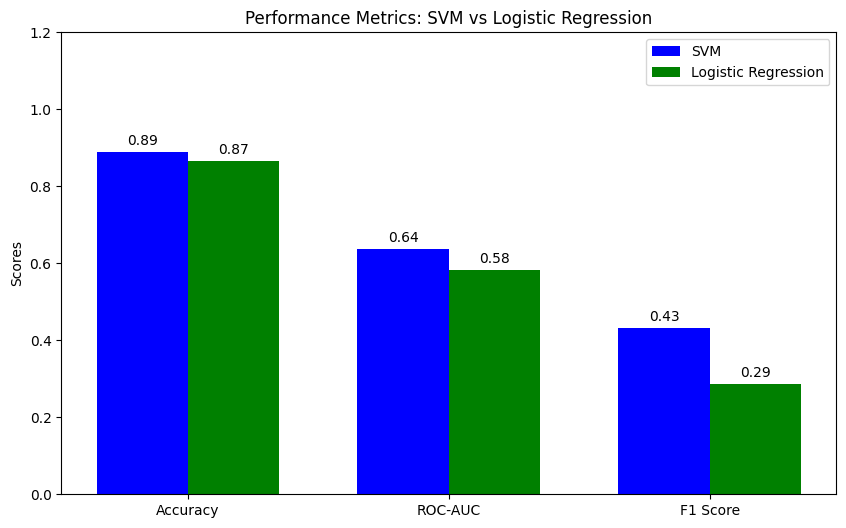

In [ ]:
# Create a bar plot to visualize the trade-off
metrics = ['Accuracy', 'ROC-AUC', 'F1 Score']
svm_scores = [svm_accuracy, svm_roc_auc, svm_f1]
logistic_scores = [logistic_accuracy, logistic_roc_auc, logistic_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x + width/2, logistic_scores, width, label='Logistic Regression', color='green')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics: SVM vs Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1.2)  # Set y-axis limit to accommodate scores between 0 and 1
plt.show()